In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from my_utils import preprocess
from my_utils import stats
from my_utils.stats import Response, Exploratory
from my_utils import plots
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 5.0)
%load_ext autoreload
%autoreload 2

# Load data 
### (exact, approx experiments)

In [5]:
exactdf = pd.read_csv('exact.csv')
approxdf = pd.read_csv('approx.csv')
# dataframes dictionary
names = ['exact', 'approx']
dfdict = {'exact': exactdf, 'approx': approxdf}

In [6]:
# change formulas name prefix in exactdf
dfdict['exact']['formula'] = exactdf['formula'].apply(lambda x: x.replace('/home/sdorco/CBS/', ''))

In [7]:
# sanity check
def rows_check():
    for name, df in dfdict.iteritems():
        print(name)
        print(df.shape)

rows_check()

approx
(1302, 15)
exact
(105000, 10)


In [8]:
# remove extension suffix (.sh) in exact set
dfdict['exact']['solver'] = dfdict['exact']['solver'].apply(lambda x: x.replace('.sh', ''))
dfdict['exact'].head()

experiment      solver                       formula  variables  clauses  \
0       exp1     glucose  CBS_k3_n100_m403_b50_787.cnf        100      403   
1       exp1  glucose-NR  CBS_k3_n100_m403_b50_787.cnf        100      403   
2       exp1     glucose  CBS_k3_n100_m403_b50_880.cnf        100      403   
3       exp1  glucose-NR  CBS_k3_n100_m403_b50_880.cnf        100      403   
4       exp1     glucose  CBS_k3_n100_m403_b50_418.cnf        100      403   

    runtime  conflicts   entropy  backbone  num_sols  
0  0.000963         78  0.357074       0.5       763  
1  0.001259         78  0.357074       0.5       763  
2  0.001650        121  0.226876       0.5       270  
3  0.001589        121  0.226876       0.5       270  
4  0.002430        245  0.468954       0.5       108

In [9]:
dfdict['exact']['solver'].unique()

array(['glucose', 'glucose-NR', 'SWDiA5BY', 'COMiniSatPS-0',
       'COMiniSatPS-1', 'COMiniSatPS-2', 'COMiniSatPS-3', 'COMiniSatPS-4',
       'COMiniSatPS-5', 'COMiniSatPS-6', 'lingeling-ayv', 'lingeling-aqw',
       'wrapperLBD', 'wrapperClause', 'wrapper-luby', 'wrapper-glucose',
       'wrapper-base', 'wrapper-60', 'wrapper-85', 'wrapper-95'], dtype=object)

In [10]:
dfdict['approx'].head()

experiment           solver               formula  variables  clauses  \
0       exp2    COMiniSatPS-6  40bits_10.dimacs.cnf        446    12980   
1       exp2    COMiniSatPS-5  40bits_10.dimacs.cnf        446    12980   
2       exp5       wrapper-60  40bits_10.dimacs.cnf        446    12980   
3       exp4  wrapper-glucose  40bits_10.dimacs.cnf        446    12980   
4       exp2    COMiniSatPS-4  40bits_10.dimacs.cnf        446    12980   

    runtime  conflicts  decisions  restarts  propagations   entropy  backbone  \
0  61.07870     224458     255797     475.0      16165613  0.130045  0.869955   
1  36.70640     234944     274595     367.0      14949163  0.130045  0.869955   
2  15.73160     117363     154663     356.0       4992154  0.130045  0.869955   
3   2.13967      26069      32948      64.0        979665  0.130045  0.869955   
4  48.07070     222780     258214     319.0      15949794  0.130045  0.869955   

   num_sols  chi_square  cpu_time  
0       2.0         0.0   4.79127  
1       2.0         0.0   4.79127  
2       2.0         0.0   4.79127  
3       2.0         0.0   4.79127  
4       2.0         0.0   4.79127

# Preprocess data

### Add solution density

In [11]:
for name, df in dfdict.iteritems():
    preprocess.add_density(df)

### (Approx dataset)

### Get stats of engines runtimes by formulas 
#### (sorted by ascending runtime mean)

In [12]:
preprocess.get_stats_df(dfdict['approx']).sort_values(by='runtime-mean')

entropy       num_sols  \
formula                                                                   
mrpp_4x4#4_5.cnf                                0.460573   1.622159e+40   
C168_FW_UT_518.cnf                              0.193598   7.830457e+98   
manthey_single-ordered-initialized-w12-b6.cnf   0.000000   1.000000e+00   
manthey_single-ordered-initialized-w14-b7.cnf   0.000000   1.000000e+00   
e2a_2.c.smt2-cvc4.cnf                           0.681204  5.643089e+170   
manthey_single-ordered-initialized-w20-b10.cnf  0.000000   1.000000e+00   
e2_2.c.smt2-cvc4.cnf                            0.716421  8.070697e+227   
mrpp_4x4#8_8.cnf                                0.447123   2.072992e+36   
mrpp_6x6#10_8.cnf                               0.429268  2.381030e+116   
mrpp_4x4#6_16.cnf                               0.575784   1.658384e+96   
mrpp_4x4#6_20.cnf                               0.589446  5.921450e+111   
mrpp_6x6#10_10.cnf                              0.483244  2.246002e+139   
e2_1.c.smt2-stp212.cnf                          0.577075  1.634845e+189   
mrpp_4x4#10_9.cnf                               0.181505   6.270494e+30   
manthey_DimacsSorter_28_0.cnf                   0.000251   2.000000e+00   
38bits_10.dimacs.cnf                            0.111607   2.000000e+00   
40bits_10.dimacs.cnf                            0.130045   2.000000e+00   
manthey_DimacsSorterHalf_30_3.cnf               0.000267   2.000000e+00   
mp1-qpr-bmp280-driver-5.cnf                     0.588079   7.636790e+72   
modgen-n200-m90860q08c40-25297.cnf              0.236555   2.358223e+62   
manthey_DimacsSorter_28_7.cnf                   0.000285   2.000000e+00   
modgen-n200-m90860q08c40-15606.cnf              0.153700   5.128190e+73   
manthey_DimacsSorter_30_1.cnf                   0.000277   2.000000e+00   
mp1-9_3.cnf                                     0.054491   6.400000e+01   
mrpp_8x8#22_11.cnf                              0.284128  7.589270e+176   
manthey_DimacsSorter_28_3.cnf                   0.000281   2.000000e+00   
mp1-9_11.cnf                                    0.091209   9.472924e+02   
manthey_DimacsSorterHalf_30_0.cnf               0.012458   4.000000e+00   
manthey_single-ordered-initialized-w48-b8.cnf   0.723197   3.600000e+01   
manthey_DimacsSorterHalf_30_7.cnf               0.105813   4.000000e+00   
...                                                  ...            ...   
manthey_DimacsSorter_30_6.cnf                   0.000275   2.000000e+00   
42bits_12.dimacs.cnf                            0.144981   2.000000e+00   
manthey_single-ordered-initialized-w54-b9.cnf   0.742229   8.263801e+01   
manthey_DimacsSorterHalf_28_4.cnf               0.000273   2.000000e+00   
manthey_DimacsSorter_28_4.cnf                   0.000273   2.000000e+00   
mp1-9_27.cnf                                    0.111729   1.196662e+04   
mp1-klieber2017s-0500-022-t12.cnf               0.000000   1.000000e+00   
mp1-klieber2017s-0490-022-t12.cnf               0.000000   1.000000e+00   
mp1-9_38.cnf                                    0.115842   2.067048e+03   
44bits_11.dimacs.cnf                            0.101806   2.000000e+00   
46bits_12.dimacs.cnf                            0.103300   2.000000e+00   
gss-18-s100.cnf                                 0.000000   1.000000e+00   
vmpc_29.cnf                                     0.000000   1.000000e+00   
manthey_DimacsSorter_35_7.cnf                   0.000146   2.000000e+00   
mp1-klieber2017s-0500-023-t12.cnf               0.000000   1.000000e+00   
mp1-klieber2017s-0490-023-t12.cnf               0.000000   1.000000e+00   
46bits_14.dimacs.cnf                            0.075362   2.000000e+00   
mp1-9_1.cnf                                     0.041152   3.200000e+01   
46bits_11.dimacs.cnf                            0.085631   2.000000e+00   
manthey_DimacsSorter_35_1.cnf                   0.000144   2.000000e+00   
mp1-klieber2017s-0500-024-t12.cnf               0.000000   1.000000e+00   

### Filter dataframe (avg runtime on our 21 engines < 15 sec)

In [13]:
preprocess.remove_formulas(dfdict['approx'])
print 'sanity check:'
rows_check()

('formulas_to_remove', 14)
('expected #rows', 294)
('actual #rows', 294)
('before ', (1302, 16))
('after ', (1008, 16))
sanity check:
approx
(1008, 16)
exact
(105000, 11)


### Timeout formulas list

In [14]:
preprocess.show_timeout_formulas(dfdict['approx'])

experiment           solver                 formula  variables  clauses  \
641        exp1          glucose  aes_32_3_keyfind_1.cnf        708     2540   
634        exp1       glucose-NR  aes_32_3_keyfind_1.cnf        708     2540   
630        exp2    COMiniSatPS-0  aes_32_3_keyfind_1.cnf        708     2540   
642        exp2    COMiniSatPS-1  aes_32_3_keyfind_1.cnf        708     2540   
645        exp2    COMiniSatPS-2  aes_32_3_keyfind_1.cnf        708     2540   
636        exp2    COMiniSatPS-3  aes_32_3_keyfind_1.cnf        708     2540   
647        exp2    COMiniSatPS-4  aes_32_3_keyfind_1.cnf          0        0   
637        exp2    COMiniSatPS-5  aes_32_3_keyfind_1.cnf          0        0   
638        exp2    COMiniSatPS-6  aes_32_3_keyfind_1.cnf          0        0   
650        exp2         SWDiA5BY  aes_32_3_keyfind_1.cnf        708     2540   
633        exp2          glucose  aes_32_3_keyfind_1.cnf        708     2540   
643        exp2    lingeling-aqw  aes_32_3_keyfind_1.cnf        708     2664   
640        exp2    lingeling-ayv  aes_32_3_keyfind_1.cnf        708     2664   
631        exp3    wrapperClause  aes_32_3_keyfind_1.cnf        708     2540   
635        exp3       wrapperLBD  aes_32_3_keyfind_1.cnf        708     2540   
646        exp4  wrapper-glucose  aes_32_3_keyfind_1.cnf        708     2540   
632        exp4     wrapper-luby  aes_32_3_keyfind_1.cnf        708     2540   
648        exp5       wrapper-60  aes_32_3_keyfind_1.cnf        708     2540   
644        exp5       wrapper-85  aes_32_3_keyfind_1.cnf        708     2540   
649        exp5       wrapper-95  aes_32_3_keyfind_1.cnf        708     2540   
639        exp5     wrapper-base  aes_32_3_keyfind_1.cnf        708     2540   
1274       exp1          glucose  aes_32_3_keyfind_2.cnf        708     2540   
1271       exp1       glucose-NR  aes_32_3_keyfind_2.cnf        708     2540   
1268       exp2    COMiniSatPS-0  aes_32_3_keyfind_2.cnf        708     2540   
1269       exp2    COMiniSatPS-1  aes_32_3_keyfind_2.cnf        708     2540   
1273       exp2    COMiniSatPS-2  aes_32_3_keyfind_2.cnf        708     2540   
1260       exp2    COMiniSatPS-3  aes_32_3_keyfind_2.cnf        708     2540   
1261       exp2    COMiniSatPS-4  aes_32_3_keyfind_2.cnf        708     2540   
1262       exp2    COMiniSatPS-5  aes_32_3_keyfind_2.cnf        708     2540   
1265       exp2    COMiniSatPS-6  aes_32_3_keyfind_2.cnf          0        0   
1267       exp2         SWDiA5BY  aes_32_3_keyfind_2.cnf        708     2540   
1275       exp2          glucose  aes_32_3_keyfind_2.cnf        708     2540   
1279       exp2    lingeling-aqw  aes_32_3_keyfind_2.cnf        708     2664   
1277       exp2    lingeling-ayv  aes_32_3_keyfind_2.cnf        708     2664   
1263       exp3    wrapperClause  aes_32_3_keyfind_2.cnf        708     2540   
1266       exp3       wrapperLBD  aes_32_3_keyfind_2.cnf        708     2540   
1276       exp4  wrapper-glucose  aes_32_3_keyfind_2.cnf        708     2540   
1264       exp4     wrapper-luby  aes_32_3_keyfind_2.cnf        708     2540   
1278       exp5       wrapper-60  aes_32_3_keyfind_2.cnf        708     2540   
1280       exp5       wrapper-85  aes_32_3_keyfind_2.cnf        708     2540   
1270       exp5       wrapper-95  aes_32_3_keyfind_2.cnf        708     2540   
1272       exp5     wrapper-base  aes_32_3_keyfind_2.cnf        708     2540   

         runtime  conflicts  decisions  restarts  propagations  entropy  \
641     398.0500    2067514    2196683    1464.0     124316686      0.0   
634   46869.9000    7203479    7551480    3381.0     514050675      0.0   
630   29955.8000   63606216   67879733  118900.0    7527975091      0.0   
642   17195.6000  105857875  122110245  556821.0   12238858616      0.0   
645    2000.0500   13448186   13945121     775.0    1685092220      0.0   
636   12628.0000   43181777   44591552   11274.0    5194660702      0.0   
647       0.0000          0          0 

Those 2 formulas had timeout on experiment 2 (lbd-cut), on cut values of 4,5,6. It is worth checking this experiment more deeply.

<h1><u>Analyze data:</u> </h1>

# Compare benchmark sets:

### Entropy and Solution density histograms

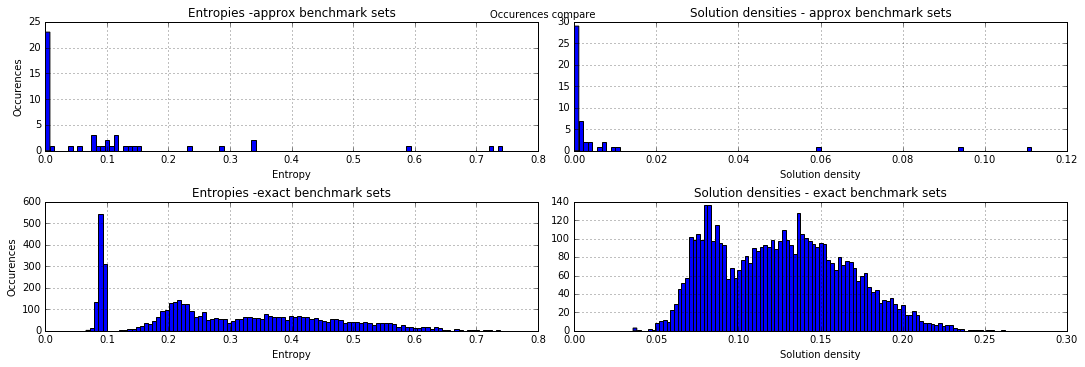

In [13]:
from my_utils import plots
plots.compare_histograms(dfdict)

The exact data set has 5000 formulas, while approximate data set has only 46 formulas and is less balanced. We might also imply that formulas in the industrial track at SAT competitions (15-17) on average have lower entropies and lower densities. Specifically, many formulas we examined by our 900 seconds criterion have very few solutions as can be seen below.

Also note that the number of clauses/variables in the exact benchmark set is fixed, hence we expect the results of the approximated set to have high variance. <b>TODO:</b> We might cluster the approximate benchmark into groups (under 1000, 10000.. variables) to check if they distribute differently.

In [11]:
preprocess.get_stats_df(dfdict['approx']).sort_values(by='num_sols')

entropy       num_sols  \
formula                                                                   
aes_32_3_keyfind_2.cnf                          0.000000   1.000000e+00   
gss-18-s100.cnf                                 0.000000   1.000000e+00   
vmpc_29.cnf                                     0.000000   1.000000e+00   
manthey_single-ordered-initialized-w12-b6.cnf   0.000000   1.000000e+00   
aes_32_3_keyfind_1.cnf                          0.000000   1.000000e+00   
gss-20-s100.cnf                                 0.000000   1.000000e+00   
manthey_single-ordered-initialized-w20-b10.cnf  0.000000   1.000000e+00   
manthey_single-ordered-initialized-w14-b7.cnf   0.000000   1.000000e+00   
mp1-klieber2017s-0490-023-t12.cnf               0.000000   1.000000e+00   
mp1-klieber2017s-0490-024-t12.cnf               0.000000   1.000000e+00   
mp1-klieber2017s-0500-022-t12.cnf               0.000000   1.000000e+00   
mp1-klieber2017s-0500-023-t12.cnf               0.000000   1.000000e+00   
mp1-klieber2017s-0500-024-t12.cnf               0.000000   1.000000e+00   
mp1-klieber2017s-0490-022-t12.cnf               0.000000   1.000000e+00   
manthey_DimacsSorter_30_1.cnf                   0.000277   2.000000e+00   
manthey_DimacsSorter_30_4.cnf                   0.000269   2.000000e+00   
manthey_DimacsSorter_30_5.cnf                   0.000260   2.000000e+00   
38bits_10.dimacs.cnf                            0.111607   2.000000e+00   
manthey_DimacsSorter_35_7.cnf                   0.000146   2.000000e+00   
manthey_DimacsSorter_28_7.cnf                   0.000285   2.000000e+00   
manthey_DimacsSorter_30_6.cnf                   0.000275   2.000000e+00   
manthey_DimacsSorter_28_4.cnf                   0.000273   2.000000e+00   
manthey_DimacsSorter_35_1.cnf                   0.000144   2.000000e+00   
manthey_DimacsSorter_28_0.cnf                   0.000251   2.000000e+00   
40bits_10.dimacs.cnf                            0.130045   2.000000e+00   
42bits_12.dimacs.cnf                            0.144981   2.000000e+00   
manthey_DimacsSorterHalf_30_3.cnf               0.000267   2.000000e+00   
44bits_11.dimacs.cnf                            0.101806   2.000000e+00   
manthey_DimacsSorterHalf_28_4.cnf               0.000273   2.000000e+00   
46bits_11.dimacs.cnf                            0.085631   2.000000e+00   
...                                                  ...            ...   
manthey_DimacsSorter_28_3.cnf                   0.000281   2.000000e+00   
48bits_14.dimacs.cnf                            0.140988   2.000000e+00   
vmpc_33.cnf                                     0.080108   3.000000e+00   
manthey_DimacsSorterHalf_30_0.cnf               0.012458   4.000000e+00   
manthey_DimacsSorterHalf_30_7.cnf               0.105813   4.000000e+00   
manthey_DimacsSorterHalf_32_1.cnf               0.339730   8.000000e+00   
manthey_DimacsSorter_32_1.cnf                   0.339730   8.000000e+00   
mp1-9_1.cnf                                     0.041152   3.200000e+01   
manthey_single-ordered-initialized-w48-b8.cnf   0.723197   3.600000e+01   
mp1-9_3.cnf                                     0.054491   6.400000e+01   
manthey_single-ordered-initialized-w54-b9.cnf   0.742229   8.263801e+01   
mp1-9_29.cnf                                    0.076744   6.613398e+02   
mp1-9_11.cnf                                    0.091209   9.472924e+02   
mp1-9_38.cnf                                    0.115842   2.067048e+03   
mp1-9_27.cnf                                    0.111729   1.196662e+04   
mrpp_4x4#10_9.cnf                               0.181505   6.270494e+30   
mrpp_4x4#8_8.cnf                                0.447123   2.072992e+36   
mrpp_4x4#4_5.cnf                                0.460573   1.622159e+40   
modgen-n200-m90860q08c40-25297.cnf              0.236555   2.358223e+62   
mp1-qpr-bmp280-driver-5.cnf                     0.588079   7.636790e+72   
modgen-n200-m90860q08c40-15606.cnf              0.153700   5.128190e+73   

Notice how many formulas have only 1 or 2 solutions from the competitions benchmark set.

Let's take a look at the distribution of (variables, clauses) in this set too:

In [12]:
df = dfdict['approx']
df = df[(df['experiment'] == 'exp1') & (df['solver'] == 'glucose')]
df.groupby(by=['variables','clauses']).size()

variables  clauses
446        12980      1
448        12700      1
538        14509      1
609        15417      1
688        18150      1
689        16922      1
690        16938      1
697        17080      1
708        2540       2
792        4096       1
841        120147     1
963        4981       1
1089       177375     1
1225       6781       1
1458       17879      1
           19075      1
           19741      1
           20086      1
           23260      1
           23319      1
1744       10897      1
1909       6331       1
1976       12182      1
2200       9086       2
3328       17780      1
3400       21268      1
3507       11386      1
3553       11381      1
3606       11560      1
3612       11612      1
3638       11677      1
3666       11883      2
3723       11743      1
3740       11875      1
3843       12306      1
3893       25462      1
3922       12464      1
3986       13057      1
4188       22452      1
4927       16333      2
4931       32359     

We can see we have diversity of formula types (variables, clauses). As noted earlier, we might cluster the set into groups using that table.

# <u>Experiments</u>

## Introduction - Statistical tests used

### <u> (1) Delta test </u>
We fit one model for the differences in the responses variable (y) between two engines. (e.g y=conflicts_a - conflicts_b )
#### Model
$ \hat{y} = \hat{intercept} + \hat{slope}*x $

Where y is the predictor for the difference in run time/conflicts and x is the exploratory variable (entropy, solution density).

#### Hypothesis tests
##### slope
$ H_0: \hat{slope} = 0 \quad H_1: \hat{slope} \neq 0$

##### intercept
$ H_0: \hat{intercept} = 0 \quad H_1: \hat{intercept} \neq 0 $

### <u> (2) Delta beta test </u> 
(More common and might also be known as A/B test)

We fit two models, for each of the engines:
#### Models
$ \hat{y_1} = \hat{intercept_1} + \hat{slope_1}*x_1 $

$ \hat{y_2} = \hat{intercept_2} + \hat{slope_2}*x_2 $

Where y is the predictor for the run time/conflicts and x is the exploratory variable (entropy, solution density).

#### Hypothesis tests
The two tests shown in delta test for each of the engines parameters (marked as 'a', 'b' in the results tables later on), and the two following tests (marked as 'diff' in the table):
##### slope
$ H_0: \hat{slope_1} - \hat{slope_2} = 0 $

$ H_1: \hat{slope_1} - \hat{slope_2} \neq 0$

##### intercept
$ H_0: \hat{intercept_1} - \hat{intercept_2} = 0 $

$ H_1: \hat{intercept_1} - \hat{intercept_2} \neq 0 $

* All p-values below are two sided (meaning we don't assume for example that intercept1 > intercept2, but intercept1 != intercept2). Practically we check both tails in the normal distribution, for this reason two tails test is considered more strict.

* For one tailed test, one can divide the p-value by 2.

# Experiment 1 - Database reduction (Glucose base solvers)

The exact benchmark set is omitted from this experiment, the formulas used there were too easy for the solver and the heuristic wasn't activated (#conflicts were the same). Hence we'll only show here the statistical results and plots for the approx benchmark set.

In [15]:
solvers = ['glucose', 'glucose-NR']
approx = stats.sub_dataframe(dfdict, 'approx', 'exp1', solvers)

Time elapsed: 0.056096


## Delta test

In [18]:
stats.delta_test(approx, Response.runtime, samples=1000)

Time elapsed: 18.760618


slope slope_confidence_interval  slope_p_val  \
exploratory-var  response                                                     
entropy          runtime   -701.8624    (-2909.0868, 3138.921)       0.6350   
solution_density runtime   1088.7322    (-1029.1204, 2031.957)       0.5487   

                           intercept  intercept_p_val  \
exploratory-var  response                               
entropy          runtime  -3008.3282           0.0142   
solution_density runtime  -2885.4233           0.0186   

                          intercept_confidence_interval  
exploratory-var  response                                
entropy          runtime         (-5092.247, -394.4032)  
solution_density runtime        (-4957.9164, -296.2749)

Units are in terms of seconds (runtime). 

By looking at the p_values, we <b>canno't reject</b> $H0$ - the equal <b>slopes</b> hypothesis for any of the exploratory variables. Although for <b>intercepts</b> tests are <b>significant</b>, hence for low entropies and for low densities the difference in runtime is significant (Glucose with reduction wins).

## Delta beta test

In [19]:
stats.delta_beta_test(approx, Response.runtime, samples=1000)

Time elapsed: 28.409397


slope slope_confidence_interval  \
test exploratory-var  response                                        
a    entropy          runtime   -164.3219        (-304.541, 61.812)   
b    entropy          runtime    547.7175   (-3899.2141, 2797.3012)   
diff entropy          runtime   -712.0394    (-2922.503, 3778.3103)   
a    solution_density runtime   -185.2609     (-321.2221, 859.1194)   
b    solution_density runtime  -1378.1634     (-2415.1678, 4134.75)   
diff solution_density runtime   1192.9025   (-3264.9089, 2163.7324)   

                                slope_p_val  intercept  intercept_p_val  \
test exploratory-var  response                                            
a    entropy          runtime        0.0925   459.7075           0.0005   
b    entropy          runtime        0.7281  3426.1598           0.0046   
diff entropy          runtime        0.6519 -2966.4524           0.0147   
a    solution_density runtime        0.5440   449.5130           0.0021   
b    solution_density runtime        0.5285  3298.9942           0.0109   
diff solution_density runtime        0.5890 -2849.4812           0.0290   

                               intercept_confidence_interval  
test exploratory-var  response                                
a    entropy          runtime           (157.1871, 686.7895)  
b    entropy          runtime          (717.0973, 5403.8709)  
diff entropy          runtime        (-4928.5749, -357.3056)  
a    solution_density runtime            (164.009, 698.5316)  
b    solution_density runtime          (278.3669, 5389.5013)  
diff solution_density runtime         (-4809.8738, 137.4658)

The delta beta test supports the delta test, we can see there's no significant difference between the slopes of each engine, this means their slopes are statistically the same. The engines intercepts differ and their p-values suggest they are not equal. This supports the claim that for low entropies and low densities Glucose with reduction is better.

* note: the field 'test' indicate the type of statistical test we checked.

* a is for predicted runtime for glucose by entropy/density , and b is for glucose-no-reduction engine. diff is the differences between the coefficients as described in the introduction.

* note: the high p-values are caused by high variation in the samples.

### Delta beta test - plot

[autoreload of my_utils.plots failed: Traceback (most recent call last):
  File "/home/deebee/anaconda2/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
AttributeError: __abstractmethods__
]


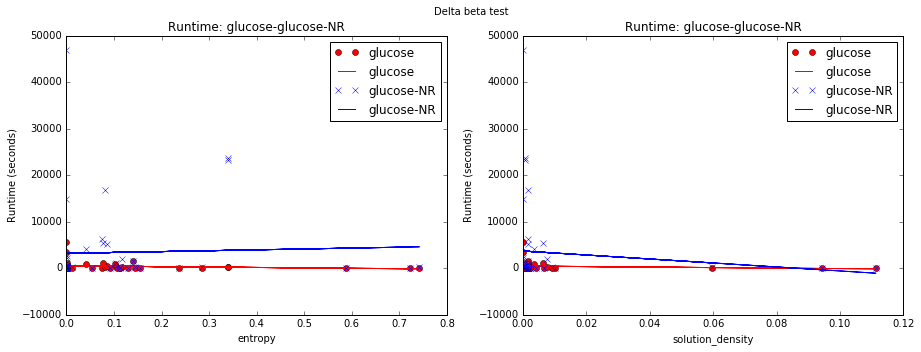

In [25]:
plots.plotter_both_runtimes(approx, Response.runtime, ['glucose', 'glucose-NR'])

We can see that indeed the intercepts differ, but the slopes are the same although it might not look for the solution density, but the statistical tests confirm that.

# Experiment 2 - Controlling LBD-cut

Now we'll compare the two benchmark sets.

In [20]:
solvers = ['COMiniSatPS-1', 'COMiniSatPS-5']
exact = stats.sub_dataframe(dfdict, 'exact', 'exp2', solvers)
approx = stats.sub_dataframe(dfdict, 'approx', 'exp2', solvers)

Time elapsed: 2.275784
Time elapsed: 0.033947


## Delta test - compare

In [21]:
stats.compare_delta(exact, approx, Response.conflicts, Response.runtime, samples=1000)

Time elapsed: 22.770874
Time elapsed: 16.871776


response     slope slope_confidence_interval  \
benchmark exploratory-var                                                   
exact     entropy           conflicts   -1.7754         (-3.6835, 0.1703)   
          solution_density  conflicts   -1.3903          (-3.377, 0.5515)   
approx    entropy             runtime  129.9720   (-1869.6337, 1275.0256)   
          solution_density    runtime  269.7494   (-1907.0509, 1209.1706)   

                            slope_p_val  intercept  intercept_p_val  \
benchmark exploratory-var                                             
exact     entropy                0.0754     2.5328           0.0202   
          solution_density       0.1672     2.5063           0.0188   
approx    entropy                0.8699  -350.3462           0.7435   
          solution_density       0.8511  -373.8407           0.7183   

                           intercept_confidence_interval  
benchmark exploratory-var                                 
exact     entropy                       (0.3785, 4.7253)  
          solution_density              (0.4809, 4.5177)  
approx    entropy                (-1911.2875, 2276.6038)  
          solution_density       (-2005.9771, 2074.2815)

We canno't reject the null hypothesis for the slopes (they could be equal to zero). Although the intercepts p-values for the <b>exact</b> benchmark suggest that for low entropy and low density LBD-1 cut value is better.

Because we've seen earlier that this experiment is worth checking, I'll check more LBD-cut values. The benchmark sets differ, and so I expect the 'good' values to be different.

In [29]:
# todo - check all combinations
solvers = ['COMiniSatPS-1', 'COMiniSatPS-6']
exact = stats.sub_dataframe(dfdict, 'exact', 'exp2', solvers)
stats.delta_test(approx, Response.runtime, samples=1000)

Time elapsed: 2.374656
Time elapsed: 0.034248
Time elapsed: 29.386981
Time elapsed: 20.543490


response     slope slope_confidence_interval  \
benchmark exploratory-var                                                   
exact     entropy           conflicts   -1.9148           (-3.95, 0.1351)   
          solution_density  conflicts   -0.8259         (-2.8832, 1.2755)   
approx    entropy             runtime -407.0683      (-757.977, 318.7335)   
          solution_density    runtime -317.3912    (-629.8647, 2231.1662)   

                            slope_p_val  intercept  intercept_p_val  \
benchmark exploratory-var                                             
exact     entropy                0.0668     2.0288           0.0705   
          solution_density       0.4269     2.0459           0.0642   
approx    entropy                0.1691   461.8976           0.1954   
          solution_density       0.6747   433.5554           0.2648   

                           intercept_confidence_interval  
benchmark exploratory-var                                 
exact     entropy                      (-0.3212, 4.0645)  
          solution_density              (0.0008, 4.2299)  
approx    entropy                  (-329.1538, 969.8634)  
          solution_density        (-401.7055, 1039.6998)

TODO: check further

## Delta beta test - compare

In [28]:
solvers = ['COMiniSatPS-1', 'COMiniSatPS-5']
exact = stats.sub_dataframe(dfdict, 'exact', 'exp2', solvers)
approx = stats.sub_dataframe(dfdict, 'approx', 'exp2', solvers)
stats.compare_delta_beta(exact, approx, Response.conflicts, Response.runtime, samples=1000)

Time elapsed: 3.034939
Time elapsed: 0.041819
Time elapsed: 54.781602
Time elapsed: 37.178789


test   response     slope  \
benchmark exploratory-var                               
exact     entropy              a  conflicts  -70.0847   
          entropy              b  conflicts  -68.3788   
          entropy           diff  conflicts   -1.7059   
          solution_density     a  conflicts  -70.6446   
          solution_density     b  conflicts  -69.3008   
          solution_density  diff  conflicts   -1.3438   
approx    entropy              a    runtime -619.8014   
          entropy              b    runtime -758.9986   
          entropy           diff    runtime  139.1971   
          solution_density     a    runtime -662.6363   
          solution_density     b    runtime -840.0952   
          solution_density  diff    runtime  177.4589   

                           slope_confidence_interval  slope_p_val  intercept  \
benchmark exploratory-var                                                      
exact     entropy               (-74.9469, -64.6347)       0.0000   270.7191   
          entropy               (-73.0916, -63.4984)       0.0000   268.1989   
          entropy                   (-3.876, 0.3478)       0.6383     2.5202   
          solution_density      (-75.8747, -65.4235)       0.0000   270.6624   
          solution_density      (-74.3676, -63.8556)       0.0000   268.1283   
          solution_density         (-3.2851, 0.6733)       0.7171     2.5341   
approx    entropy             (-1080.6818, 182.6194)       0.0617  1068.5663   
          entropy              (-1528.292, 963.9796)       0.3051  1446.6221   
          entropy            (-1534.5375, 1289.9967)       0.8637  -378.0558   
          solution_density   (-1209.4305, 4995.5569)       0.6422  1026.1593   
          solution_density    (-1599.0523, 4367.029)       0.6769  1428.7208   
          solution_density   (-1144.7688, 1207.3951)       0.9427  -402.5615   

                            intercept_p_val intercept_confidence_interval  
benchmark exploratory-var                                                  
exact     entropy                    0.0000          (265.3734, 276.1562)  
          entropy                    0.0000           (262.979, 273.1008)  
          entropy                    0.5076                 (0.466, 4.64)  
          solution_density           0.0000          (265.2155, 276.1006)  
          solution_density           0.0000          (262.8733, 273.1712)  
          solution_density           0.5078              (0.4486, 4.6339)  
approx    entropy                    0.0081         (163.5072, 1742.9247)  
          entropy                    0.1323        (-817.4057, 2564.0392)  
          entropy                    0.7168       (-1959.8058, 2024.6158)  
          solution_density           0.0445          (96.6246, 2157.1551)  
          solution_density           0.1865        (-921.1761, 2938.2701)  
          solution_density           0.7364       (-2124.7947, 2028.9724)

The delta beta test supports the delta test, we canno't reject any of the hypothesis according to this test (slope and intercepts difference aren't significant, could be equal to zero in both benchmarks).

The heuristic effect of controlling LBD-cut might not be explained by entropy / solution density (or at least not for the cut values examined, there might be other permutation of low, high cut values where we can reject $H0$).

[autoreload of my_utils.plots failed: Traceback (most recent call last):
  File "/home/deebee/anaconda2/lib/python2.7/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
AttributeError: __abstractmethods__
]


Time elapsed: 2.384849
Time elapsed: 0.036256


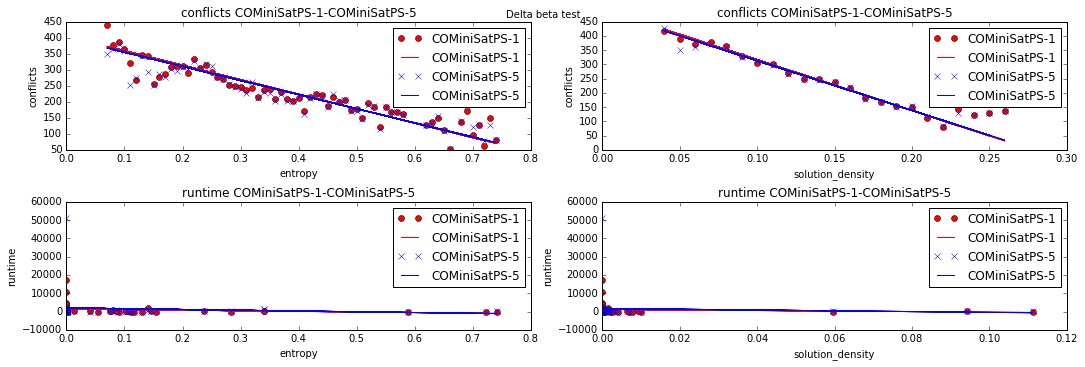

In [76]:
plots.plotter_compare(exact, approx, Response.conflicts, Response.runtime, solvers)

First row is for exact benchmark, second is for approx.

The graphs indeed show that the slopes and the intercepts are practically the same.

# Experiment 3 - Clause saving criterion (ClauseSize vs. LBD)

In [77]:
solvers = ['wrapperClause', 'wrapperLBD']
exact = stats.sub_dataframe(dfdict, 'exact', 'exp3', solvers)
approx = stats.sub_dataframe(dfdict, 'approx', 'exp3', solvers)

Time elapsed: 3.542320
Time elapsed: 0.043172


In [33]:
stats.compare_delta(exact, approx, Response.conflicts, Response.runtime, samples=1000)

Time elapsed: 1701.756768
Time elapsed: 18.400294


response     slope slope_confidence_interval  \
benchmark exploratory-var                                                   
exact     entropy           conflicts   -0.0906         (-2.8381, 2.6684)   
          solution_density  conflicts    1.7770         (-0.9701, 4.5848)   
approx    entropy             runtime  729.5910    (-864.8812, 1414.3773)   
          solution_density    runtime  407.8472    (-2592.8748, 901.0785)   

                            slope_p_val  intercept  intercept_p_val  \
benchmark exploratory-var                                             
exact     entropy                0.9476    -9.4459           0.0000   
          solution_density       0.2000    -9.4167           0.0000   
approx    entropy                0.2670  -702.9445           0.3115   
          solution_density       0.6930  -650.4415           0.3745   

                           intercept_confidence_interval  
benchmark exploratory-var                                 
exact     entropy                    (-12.2859, -6.8431)  
          solution_density            (-11.9914, -6.664)  
approx    entropy                 (-1622.4164, 869.1249)  
          solution_density        (-1600.5889, 934.3728)

We can see that entropy and solution density slopes could be statistically equal to zero (both for exact and approx sets). The intercept p-value in the exact benchmark set suggest that for low entropies/densities clause size is better. But the approximate dataset results doesn't support that, it could be that the difference in slopes is statistically significant but too small.

In [34]:
stats.compare_delta_beta(exact, approx, Response.conflicts, Response.runtime, samples=1000)

Time elapsed: 279.412085
Time elapsed: 27.342240


test   response     slope  \
benchmark exploratory-var                               
exact     entropy              a  conflicts  -78.4127   
          entropy              b  conflicts  -78.2869   
          entropy           diff  conflicts   -0.1258   
          solution_density     a  conflicts  -77.4872   
          solution_density     b  conflicts  -79.2640   
          solution_density  diff  conflicts    1.7768   
approx    entropy              a    runtime   86.5861   
          entropy              b    runtime -661.1307   
          entropy           diff    runtime  747.7167   
          solution_density     a    runtime  -86.6638   
          solution_density     b    runtime -539.9569   
          solution_density  diff    runtime  453.2931   

                           slope_confidence_interval  slope_p_val  intercept  \
benchmark exploratory-var                                                      
exact     entropy               (-83.9048, -73.0859)       0.0000   287.8301   
          entropy               (-83.8714, -72.5317)       0.0000   297.2432   
          entropy                  (-2.6017, 2.5992)       0.9752    -9.4131   
          solution_density      (-83.1201, -71.8263)       0.0000   287.6218   
          solution_density      (-85.0265, -73.4788)       0.0000   297.0365   
          solution_density         (-0.8262, 4.4716)       0.6580    -9.4147   
approx    entropy              (-307.9209, 241.7827)       0.5272   486.3919   
          entropy             (-1279.6614, 807.3411)       0.2669  1184.8630   
          entropy             (-832.3039, 1445.5178)       0.2211  -698.4711   
          solution_density      (-315.4799, 39.8083)       0.6626   482.2093   
          solution_density   (-1030.5969, 1594.1844)       0.6847  1195.9495   
          solution_density    (-2327.8094, 980.9688)       0.7360  -713.7402   

                            intercept_p_val intercept_confidence_interval  
benchmark exploratory-var                                                  
exact     entropy                    0.0000           (282.4851, 293.251)  
          entropy                    0.0000          (291.7527, 302.9947)  
          entropy                    0.0200           (-12.1413, -6.7457)  
          solution_density           0.0000           (281.928, 293.0326)  
          solution_density           0.0000          (291.3609, 302.5792)  
          solution_density           0.0223           (-12.1922, -6.5846)  
approx    entropy                    0.0000          (240.3601, 686.3243)  
          entropy                    0.0859        (-314.0942, 2089.7944)  
          entropy                    0.3182        (-1640.5196, 804.3143)  
          solution_density           0.0001          (244.7097, 670.2467)  
          solution_density           0.1169        (-601.3903, 2133.2479)  
          solution_density           0.3553       (-1745.0234, 1091.9846)

Notice the high p-values for the 'diff' rows, they suggest that the difference between slopes in both benchmarks/exploratory variables (entropy/density) isn't statistically significant. However, there's a significant difference in the intercept values for each engine by the exact benchmark set, but once again the approx benchmark set doesn't support that.

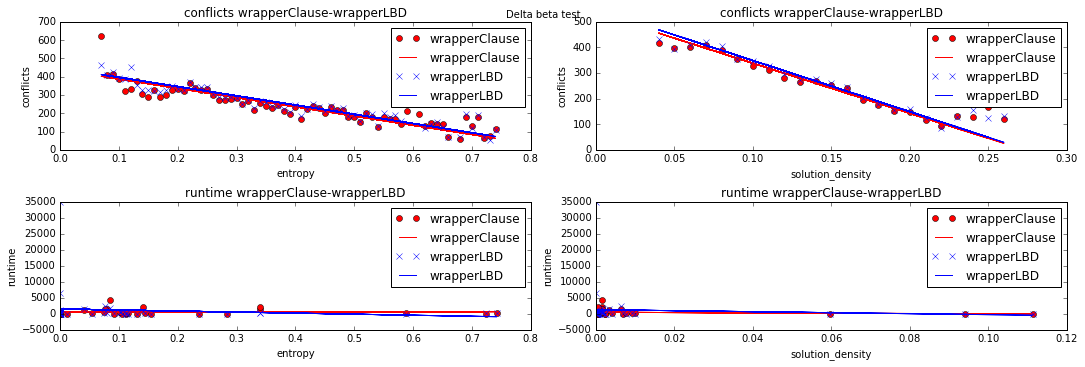

In [78]:
plots.plotter_compare(exact, approx, Response.conflicts, Response.runtime, solvers)

The graph indeed show no differences between the trend lines.

# Experiment 4 - Restarts type (Luby vs. Glucose)

In [79]:
solvers = ['wrapper-luby', 'wrapper-glucose']
exact = stats.sub_dataframe(dfdict, 'exact', 'exp4', solvers)
approx = stats.sub_dataframe(dfdict, 'approx', 'exp4', solvers)

Time elapsed: 3.133255
Time elapsed: 0.041641


In [37]:
stats.compare_delta(exact, approx, Response.conflicts, Response.runtime, samples=1000)

Time elapsed: 22.927945
Time elapsed: 14.500483


response     slope slope_confidence_interval  \
benchmark exploratory-var                                                   
exact     entropy           conflicts   -2.3470         (-8.2822, 3.3884)   
          solution_density  conflicts    1.6796         (-3.9127, 7.5532)   
approx    entropy             runtime  540.2974      (-898.24, 1108.9772)   
          solution_density    runtime  514.5984    (-3685.2685, 1066.246)   

                            slope_p_val  intercept  intercept_p_val  \
benchmark exploratory-var                                             
exact     entropy                0.4377   -29.8928           0.0000   
          solution_density       0.5589   -29.8237           0.0000   
approx    entropy                0.3516  -684.9841           0.3484   
          solution_density       0.7281  -633.6763           0.4188   

                           intercept_confidence_interval  
benchmark exploratory-var                                 
exact     entropy                   (-36.1916, -23.6148)  
          solution_density          (-35.9186, -23.4411)  
approx    entropy                 (-1504.0278, 1005.111)  
          solution_density       (-1618.2917, 1070.1351)

Once again, the difference in the slopes isn't statistically significant for both benchmarks. Though the intercepts for the exact benchmark set are different, but the approx one doesn't support that.

In [38]:
stats.compare_delta_beta(exact, approx, Response.conflicts, Response.runtime, samples=1000)

Time elapsed: 41.388524
Time elapsed: 29.061886


test   response     slope  \
benchmark exploratory-var                               
exact     entropy              a  conflicts  -80.6401   
          entropy              b  conflicts  -78.3765   
          entropy           diff  conflicts   -2.2637   
          solution_density     a  conflicts  -77.7635   
          solution_density     b  conflicts  -79.5139   
          solution_density  diff  conflicts    1.7505   
approx    entropy              a    runtime -145.8221   
          entropy              b    runtime -692.5012   
          entropy           diff    runtime  546.6791   
          solution_density     a    runtime -115.3222   
          solution_density     b    runtime -573.2989   
          solution_density  diff    runtime  457.9767   

                           slope_confidence_interval  slope_p_val  intercept  \
benchmark exploratory-var                                                      
exact     entropy               (-86.2894, -75.3637)       0.0000   267.3620   
          entropy               (-84.0239, -72.7785)       0.0000   297.0702   
          entropy                   (-8.0905, 3.627)       0.5743   -29.7081   
          solution_density      (-82.8737, -72.5191)       0.0000   267.2558   
          solution_density      (-85.3068, -73.7919)       0.0000   296.9768   
          solution_density         (-4.3935, 7.4112)       0.6540   -29.7210   
approx    entropy              (-290.4171, 104.0916)       0.1771   538.9629   
          entropy              (-1345.0729, 851.621)       0.2727  1226.9205   
          entropy             (-917.4383, 1126.7444)       0.3934  -687.9576   
          solution_density     (-205.1594, 119.6883)       0.7140   547.7699   
          solution_density    (-1096.2841, 2087.022)       0.6620  1194.7813   
          solution_density    (-3080.4185, 958.2874)       0.7342  -647.0114   

                            intercept_p_val intercept_confidence_interval  
benchmark exploratory-var                                                  
exact     entropy                    0.0000          (262.0384, 272.6997)  
          entropy                    0.0000          (291.4224, 303.0306)  
          entropy                    0.0000          (-35.8739, -23.4945)  
          solution_density           0.0000          (261.9734, 272.3289)  
          solution_density           0.0000          (290.6674, 302.6406)  
          solution_density           0.0000          (-35.8269, -23.4021)  
approx    entropy                    0.0003           (211.908, 775.4663)  
          entropy                    0.1042        (-506.4128, 2160.4363)  
          entropy                    0.3714        (-1502.3464, 979.0909)  
          solution_density           0.0009           (203.1438, 794.815)  
          solution_density           0.1404        (-744.2908, 2137.0798)  
          solution_density           0.4341       (-1531.5883, 1091.5222)

Same conclusions for the delta beta test.

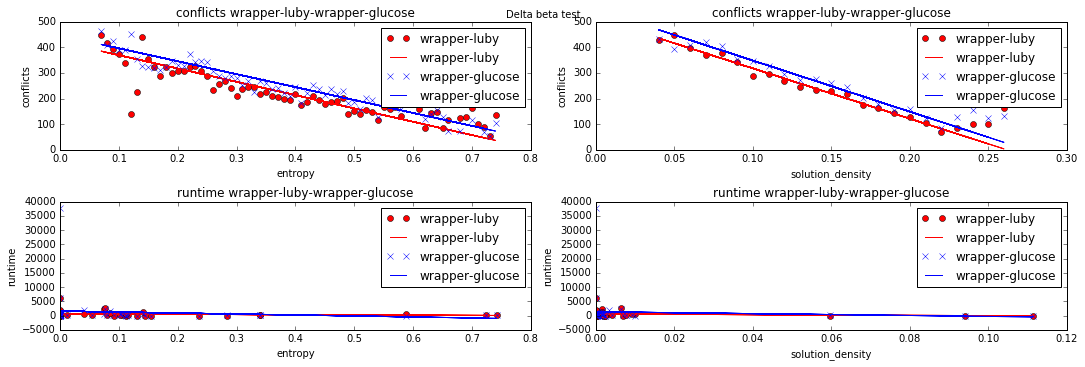

In [80]:
plots.plotter_compare(exact, approx, Response.conflicts, Response.runtime, solvers)

The slopes in the exact benchmark set does look the same, but the intercepts differ and indeed we can see that. About the approximate set there seem to be no difference.

# Experiment 5 - Variable decay rate

In [81]:
solvers = ['wrapper-60', 'wrapper-95']
exact = stats.sub_dataframe(dfdict, 'exact', 'exp5', solvers)
approx = stats.sub_dataframe(dfdict, 'approx', 'exp5', solvers)

Time elapsed: 3.388982
Time elapsed: 0.041300


In [40]:
stats.compare_delta(exact, approx, Response.conflicts, Response.runtime, samples=1000)

Time elapsed: 24.434914
Time elapsed: 15.858770


response    slope slope_confidence_interval  \
benchmark exploratory-var                                                  
exact     entropy           conflicts -12.8955      (-15.1162, -10.7548)   
          solution_density  conflicts -11.2231       (-13.5658, -8.9164)   
approx    entropy             runtime   7.9885     (-200.0735, 139.8258)   
          solution_density    runtime -71.9667     (-159.3711, 101.6934)   

                            slope_p_val  intercept  intercept_p_val  \
benchmark exploratory-var                                             
exact     entropy                0.0000    23.2330           0.0000   
          solution_density       0.0000    23.2703           0.0000   
approx    entropy                0.9289   232.0070           0.0288   
          solution_density       0.6658   224.7851           0.0385   

                           intercept_confidence_interval  
benchmark exploratory-var                                 
exact     entropy                     (20.9471, 25.4317)  
          solution_density            (20.8849, 25.4664)  
approx    entropy                     (20.3693, 431.752)  
          solution_density            (2.4197, 420.5503)

Once again, the slopes are statistically equal (as for the apporximate benchmark set), But the intercepts are statistcally different and the approximate benchmark supports that.

In [41]:
stats.compare_delta_beta(exact, approx, Response.conflicts, Response.runtime, samples=1000)

Time elapsed: 50.212703
Time elapsed: 33.761005


test   response     slope  \
benchmark exploratory-var                               
exact     entropy              a  conflicts  -73.7453   
          entropy              b  conflicts  -60.7982   
          entropy           diff  conflicts  -12.9471   
          solution_density     a  conflicts  -70.1680   
          solution_density     b  conflicts  -58.9953   
          solution_density  diff  conflicts  -11.1727   
approx    entropy              a    runtime -127.3839   
          entropy              b    runtime -135.4698   
          entropy           diff    runtime    8.0859   
          solution_density     a    runtime -176.6392   
          solution_density     b    runtime  -98.3609   
          solution_density  diff    runtime  -78.2783   

                           slope_confidence_interval  slope_p_val  intercept  \
benchmark exploratory-var                                                      
exact     entropy               (-78.9455, -68.4029)       0.0000   263.2764   
          entropy               (-65.1072, -56.2451)       0.0000   240.0005   
          entropy               (-15.1091, -10.7197)       0.0002    23.2759   
          solution_density      (-75.2151, -65.0796)       0.0000   263.1592   
          solution_density      (-63.3316, -54.7051)       0.0000   239.9226   
          solution_density       (-13.3426, -8.9778)       0.0012    23.2365   
approx    entropy                (-285.1155, 8.4596)       0.1167   610.8735   
          entropy               (-216.8288, 18.4455)       0.0234   376.4712   
          entropy              (-232.3926, 132.1039)       0.9361   234.4023   
          solution_density       (-274.0478, 135.91)       0.4438   610.2070   
          solution_density      (-164.6576, 41.1321)       0.4950   382.7143   
          solution_density     (-170.3546, 267.6323)       0.7735   227.4927   

                            intercept_p_val intercept_confidence_interval  
benchmark exploratory-var                                                  
exact     entropy                    0.0000          (258.0414, 268.1709)  
          entropy                    0.0000            (235.56, 244.3284)  
          entropy                    0.0000            (21.0438, 25.4904)  
          solution_density           0.0000          (258.1654, 268.5195)  
          solution_density           0.0000           (235.428, 244.2503)  
          solution_density           0.0000            (21.0007, 25.5034)  
approx    entropy                    0.0000          (388.9619, 815.4804)  
          entropy                    0.0000          (226.2454, 499.7323)  
          entropy                    0.0743           (25.4276, 435.5857)  
          solution_density           0.0000          (372.1652, 832.1116)  
          solution_density           0.0000           (228.479, 515.5137)  
          solution_density           0.1123           (14.2179, 435.1181)

The slopes for the exact benchmark set are statistcally different, while for the approximate set they aren't. The intercepts on the other hand are significantely different (in the approximate set the p-values suggest that they might be equal). We can imply that for low entropies/densities there'a difference in the runtime/#conflicts.

We can see that for entropy the average difference between intecepts is 234 seconds (G0.6 is worse than G0.95). While the solution density suggests the same (We can also see that the confidence intervals are somewhat equal).

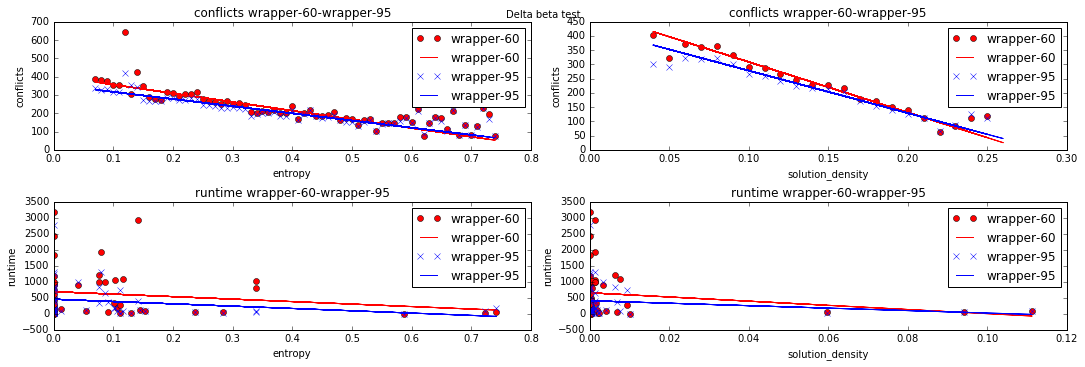

In [82]:
plots.plotter_compare(exact, approx, Response.conflicts, Response.runtime, solvers)

To conclude, in this specific experiment solution density and entropy might be good predictors for the #conflicts / run-time. 

# Summary

We've seen that in each of the experiments we had hard time to conclude anything about the slopes, or the differences between them for each examined engine. 

Most of the intercepts on the other hand were statistcally different.

This suggests that for low entropy/low densities it's important to choose the right heuristic.

We have also seen that on each experiment the approximate yielded poor p-values for our statistical tests, the cause of this might be the fact that the formulas shapes aren't fixed.

Another question we should ask ourselves is, should the entropy / solution density effect some heuristic activation? 

And also, does it make sense that for the last experiment only the entropy/solution density predicted better the effect of activation?